# **Project Name**    - Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
Name - shawn lasrado


# **Project Summary -**

Shopper Spectrum: Customer Segmentation and Product Recommendations
This project aims to analyze e-commerce transaction data to identify customer segments and recommend relevant products, enhancing user experience and driving sales. Using the provided retail dataset, data preprocessing removes null customer IDs, cancelled invoices, and invalid prices or quantities. Exploratory Data Analysis (EDA) examines transaction volumes by country, top-selling products, purchase trends, and customer spending patterns.

Customer segmentation is performed using Recency, Frequency, and Monetary (RFM) analysis. After calculating RFM values, features are standardized, and KMeans clustering is applied. The optimal number of clusters is determined using the Elbow method, and customer profiles are labeled as High-Value, Regular, Occasional, or At-Risk.

The recommendation system uses item-based collaborative filtering. A customer-product purchase matrix is built, cosine similarity between products is computed, and a similarity heatmap visualizes product relationships. A recommendation function suggests the top five similar products for any selected product.

A Streamlit web application integrates two modules: a product recommendation module and a customer segmentation module, where RFM inputs return the predicted customer segment. The project delivers clean, documented Python code, visualizations, and an interactive Streamlit app to showcase insights and recommendations.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Step 1: Dataset Collection and understanding***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [2]:
# Load Dataset
retail_df = pd.read_csv('online_retail.csv')

### Dataset First View

In [3]:
# Dataset First Look
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
retail_df.shape

(541909, 8)

In [5]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Dataset Information

In [6]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
retail_df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

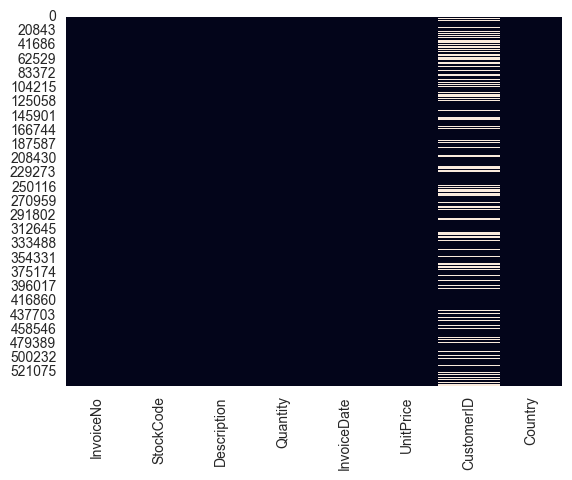

In [9]:
# Visualizing the missing values
sns.heatmap(retail_df.isnull(), cbar=False)

In [10]:
# Dataset Columns
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Dataset Describe
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
retail_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Step 2: 📌 Data Preprocessing:

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
retail_df = retail_df.dropna(subset=['CustomerID'])
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.startswith('C')]
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.drop_duplicates(inplace=True)
retail_df['Description'] = retail_df['Description'].fillna('Unknown')


In [14]:
retail_df.shape
print(retail_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Netherlands          94
Spain                90
Australia            57
Portugal             57
Switzerland          51
Name: InvoiceNo, dtype: int64


/var/folders/x_/53m22g590190k68hk89dq3tc0000gn/T/ipykernel_85704/1600907931.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10).values, palette='viridis')


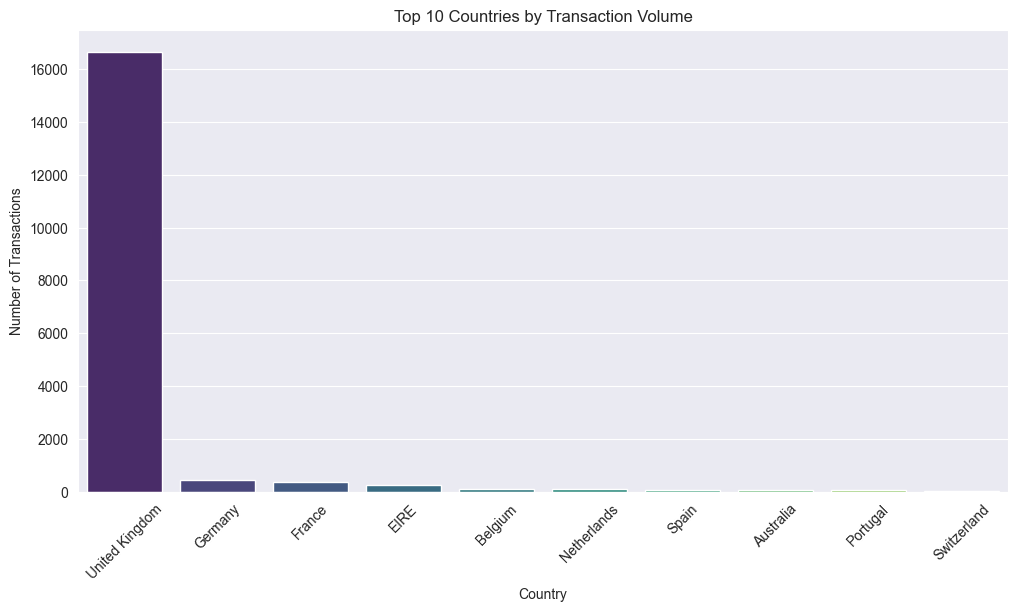

In [15]:
# Chart - 1 Analyze transaction volume by country
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Country and count number of transactions
country_sales = retail_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Display top 10 countries
print(country_sales.head(10))

# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10).values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Transaction Volume")
plt.ylabel("Number of Transactions")
plt.xlabel("Country")
plt.show()


##### 1. Why did you pick the specific chart?

* A bar chart is ideal for comparing transaction counts between different countries because:

* It clearly shows which countries have the highest and lowest number of transactions.

* It allows quick identification of top markets for targeted business focus.



##### 2. What is/are the insight(s) found from the chart?

* The UK dominates transaction volume (likely due to being the primary market).

* A few countries like Germany, France, Netherlands show moderate activity.

* Many countries have very low sales,

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

* Marketing efforts can be focused on top-performing countries to maximize returns.

* Growth strategies (localized campaigns, promotions) can be planned for mid-tier countries to boost transactions.

* Low-performing countries can be analyzed for distribution or marketing improvements.

Negative Insight:

* Heavy dependency on the UK market poses a risk. If UK demand drops, sales could decline significantly.

* Diversifying sales across more countries can reduce dependency and risk.

#### Chart - 2

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


/var/folders/x_/53m22g590190k68hk89dq3tc0000gn/T/ipykernel_85704/1699285203.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.head(10).values, y=top_products.head(10).index, palette='mako')


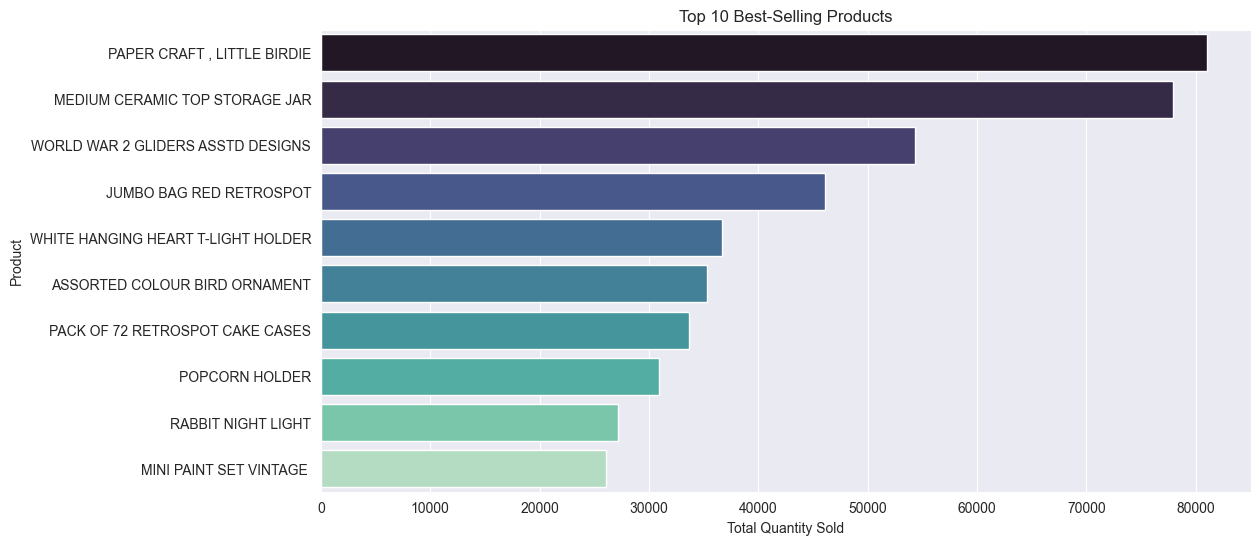

In [16]:
# Chart - 2 Calculate total quantity sold per product
top_products = retail_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Display top 10 products
print(top_products.head(10))

# Plot top 10 products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.head(10).values, y=top_products.head(10).index, palette='mako')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing product sales volumes:

* It clearly displays the names of the top-selling products without overlapping text.

* It quickly highlights which products dominate in sales.

##### 2. What is/are the insight(s) found from the chart?

* The top-selling products are mostly popular, frequently purchased items (e.g bags, mugs, seasonal items, craft kits).

* Sales are highly concentrated in a few products, showing a product demand imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Impact:

* High-demand products should be kept in stock and possibly promoted more to sustain revenue.

* Insights can guide inventory management to avoid stockouts.

* Marketing teams can cross-sell related items with these top products.

Negative Insight:

* Over-reliance on a few products poses risk if demand drops or supply issues occur.

* Diversifying product sales through bundles, discounts, or promotions for slow-moving items can reduce this risk.

#### Chart - 3

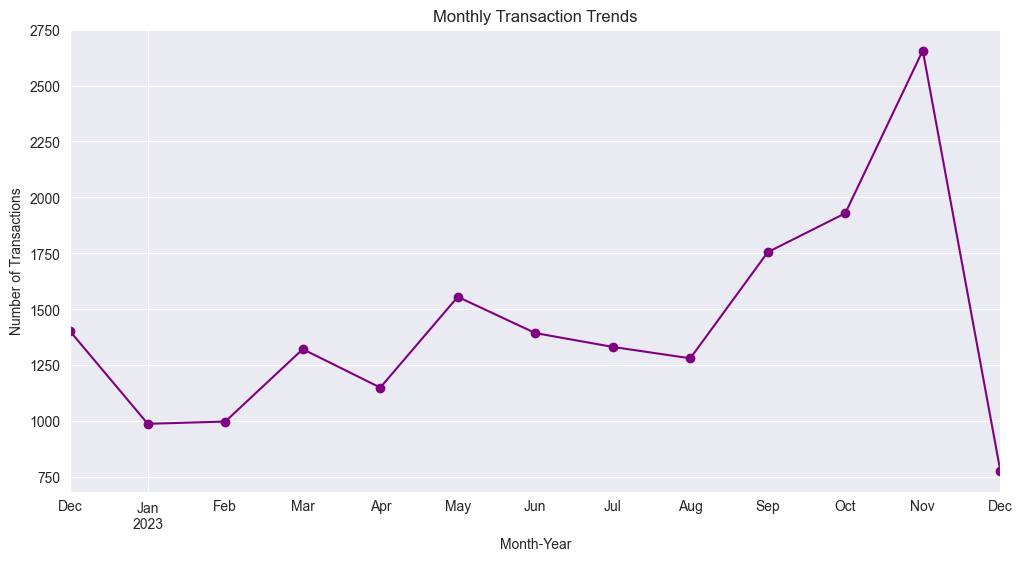

In [17]:
# Chart - 3 Visualize purchase trends over time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Year-Month column
retail_df['YearMonth'] = retail_df['InvoiceDate'].dt.to_period('M')

# Group by Year-Month and count transactions
monthly_trends = retail_df.groupby('YearMonth')['InvoiceNo'].nunique()

# Plot monthly trends
plt.figure(figsize=(12,6))
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Transaction Trends")
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for showing trends over time:

* It clearly highlights seasonal peaks and drops in monthly transactions.

* It helps detect patterns for business planning.

##### 2. What is/are the insight(s) found from the chart?

* There are spikes in certain months (likely November–December due to holiday shopping).

* Some months show lower transaction activity.

* The trend suggests seasonality in customer behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Impact:

* Businesses can plan marketing campaigns and inventory stocking ahead of peak months.

* Slow months can be targeted with discounts or promotions to boost sales.

* Identifying seasonal demand helps optimize cash flow and warehouse management.

Negative Insight:

* If the business relies heavily on peak months, a drop in those periods could cause revenue instability.

* Diversifying sales channels or promoting evergreen products can reduce dependency on seasonal peaks.

#### Chart - 4

In [18]:
# Inspect monetary distribution per transaction and customer
customer_monetary = retail_df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False)

customer_monetary

CustomerID
14096.0    33332.45
14911.0    26150.35
17841.0    19471.68
12744.0    12949.99
12748.0    11788.31
             ...   
17752.0        0.42
13366.0        0.39
12875.0        0.34
18084.0        0.29
15118.0        0.17
Name: UnitPrice, Length: 4338, dtype: float64

In [19]:
customer_monetary = retail_df.groupby('InvoiceNo')['UnitPrice'].sum().sort_values(ascending=False)
customer_monetary

InvoiceNo
551697    8142.75
571751    6068.06
573080    4161.06
573077    4161.06
548813    4037.77
           ...   
569235       0.12
579725       0.12
567869       0.08
544152       0.06
560599       0.06
Name: UnitPrice, Length: 18532, dtype: float64

#### Chart - 5

In [20]:
# RFM distributions
import datetime as dt

# Reference date (max InvoiceDate in dataset + 1 day)
reference_date = retail_df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM calculation
rfm = retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'Quantity': lambda x: (x * retail_df.loc[x.index, 'UnitPrice']).sum()  # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Check first few values
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [21]:
# --- Model Training and Saving ---
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Fit scaler and cluster model
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Save models for later use in Streamlit
joblib.dump(scaler, "scaler.joblib")
joblib.dump(kmeans, "kmeans.joblib")
print("Scaler and KMeans model saved as .joblib files.")


Scaler and KMeans model saved as .joblib files.


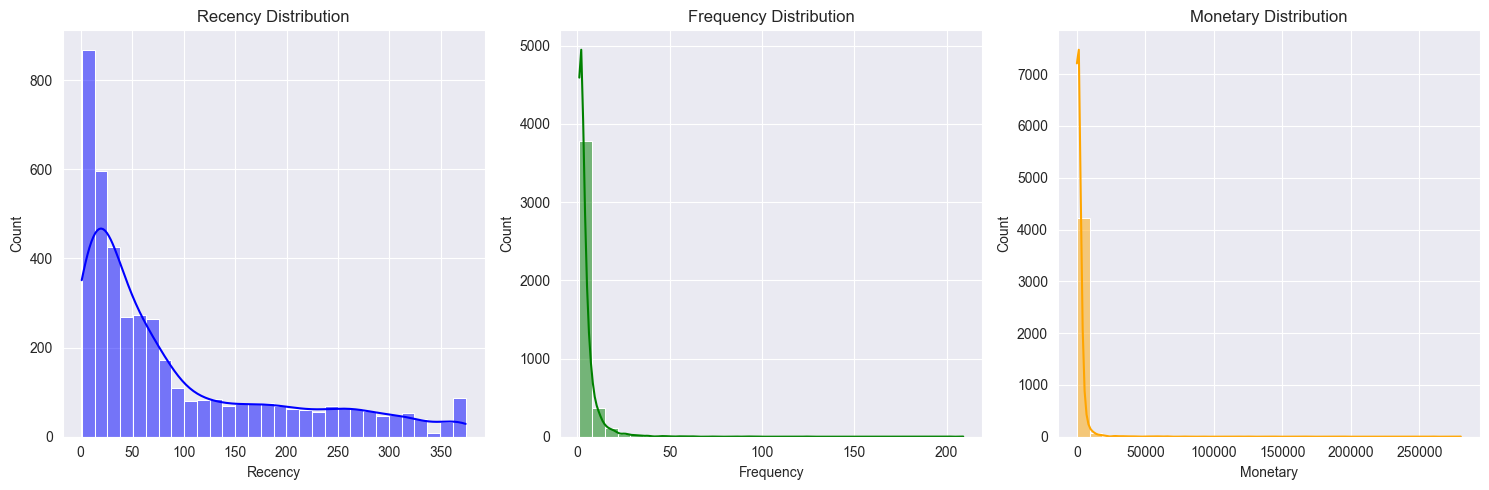

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

# Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')

# Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution')

# Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='orange')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


##### 1. What did I do?

I calculated Recency, Frequency, and Monetary values for each customer, then scaled the data and trained a KMeans model with 4 clusters. I saved both the scaler and model so they can be used later in the Streamlit app. Finally, I plotted histograms for Recency, Frequency, and Monetary to see how these values are distributed among customers

#### Chart - 6

In [23]:
# Elbow curve for cluster selection
from sklearn.preprocessing import StandardScaler

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

rfm_scaled[:5]  # check first 5 scaled values


array([[ 2.33457414, -0.4250965 ,  8.36301037],
       [-0.90534032,  0.3544168 ,  0.2516989 ],
       [-0.17535959, -0.03533985, -0.02798783],
       [-0.73534481, -0.4250965 , -0.03240559],
       [ 2.17457836, -0.4250965 , -0.19081155]])

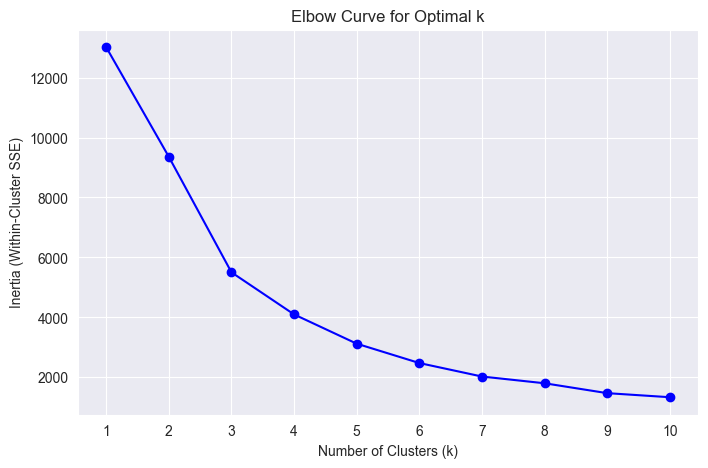

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []  # to store within-cluster sum of squares
K = range(1, 11)  # test clusters from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xticks(np.arange(1, 11, 1))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Curve for Optimal k')
plt.show()


##### 1. What did I do?

I used the Elbow Method to determine how many clusters would be ideal for grouping my customers based on their RFM (Recency, Frequency, Monetary) characteristics. First, I scaled these features so each has equal influence. Then, I ran KMeans clustering multiple times, increasing the number of clusters from 1 up to 10. For each run, I recorded the “inertia” (which measures how tightly the data points fit within each cluster). I plotted the number of clusters against inertia and looked for the point where adding another cluster does not significantly reduce the inertia this "elbow point" on the graph suggests the optimal number of customer segments to use.

#### Chart - 7

In [25]:
# Customer cluster profiles
from sklearn.cluster import KMeans

# Choose k from Elbow Curve (adjust if needed)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,1


In [26]:
cluster_profiles = rfm.groupby('Cluster').mean().round(2)
cluster_profiles


,Recency,Frequency,Monetary
Cluster,,,
0,40.98,4.85,2005.83
1,246.02,1.58,629.36
2,7.14,80.21,122748.79


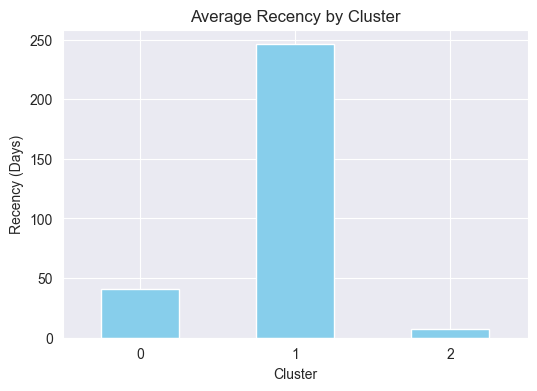

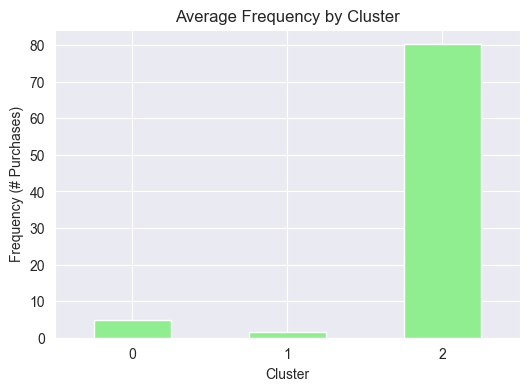

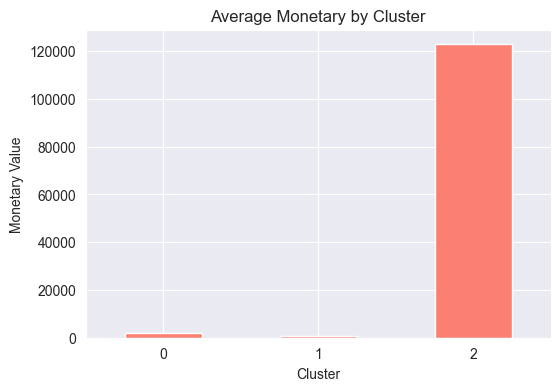

In [27]:
import matplotlib.pyplot as plt

# Plot Recency
plt.figure(figsize=(6,4))
cluster_profiles['Recency'].plot(kind='bar', color='skyblue')
plt.title("Average Recency by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Recency (Days)")
plt.xticks(rotation=0)
plt.show()

# Plot Frequency
plt.figure(figsize=(6,4))
cluster_profiles['Frequency'].plot(kind='bar', color='lightgreen')
plt.title("Average Frequency by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequency (# Purchases)")
plt.xticks(rotation=0)
plt.show()

# Plot Monetary
plt.figure(figsize=(6,4))
cluster_profiles['Monetary'].plot(kind='bar', color='salmon')
plt.title("Average Monetary by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Monetary Value")
plt.xticks(rotation=0)
plt.show()


In [28]:
labels = {
    0: 'High-Value',
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}
rfm['Segment'] = rfm['Cluster'].map(labels)

rfm.head()


,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
12346.0,326,1,77183.60,1,Regular
12347.0,2,7,4310.00,0,High-Value
12348.0,75,4,1797.24,0,High-Value
12349.0,19,1,1757.55,0,High-Value
12350.0,310,1,334.40,1,Regular


##### 1. What did I do?

After determining the optimal number of clusters using the Elbow Method, I selected 3 clusters to segment the customers based on their RFM (Recency, Frequency, and Monetary) values. I applied KMeans clustering to assign each customer to one of these three groups.

Next, I calculated the average Recency, Frequency, and Monetary values for each cluster to create a “profile” of each customer segment. This helps to interpret and compare the typical behaviors in each group.

I visualized these profiles by plotting separate bar charts for each metric:

* The first bar chart shows the average recency by cluster (lower recency means more active customers).

* The second chart shows average purchase frequency for each cluster.

* The third chart displays the average monetary value per cluster.

These visualizations make it easy to see how the clusters differ from each other, so you can identify for example which groups are your most loyal or most valuable customers and which are less engaged. This insight is essential for targeted marketing and strategic business decisions.

#### Chart - 8

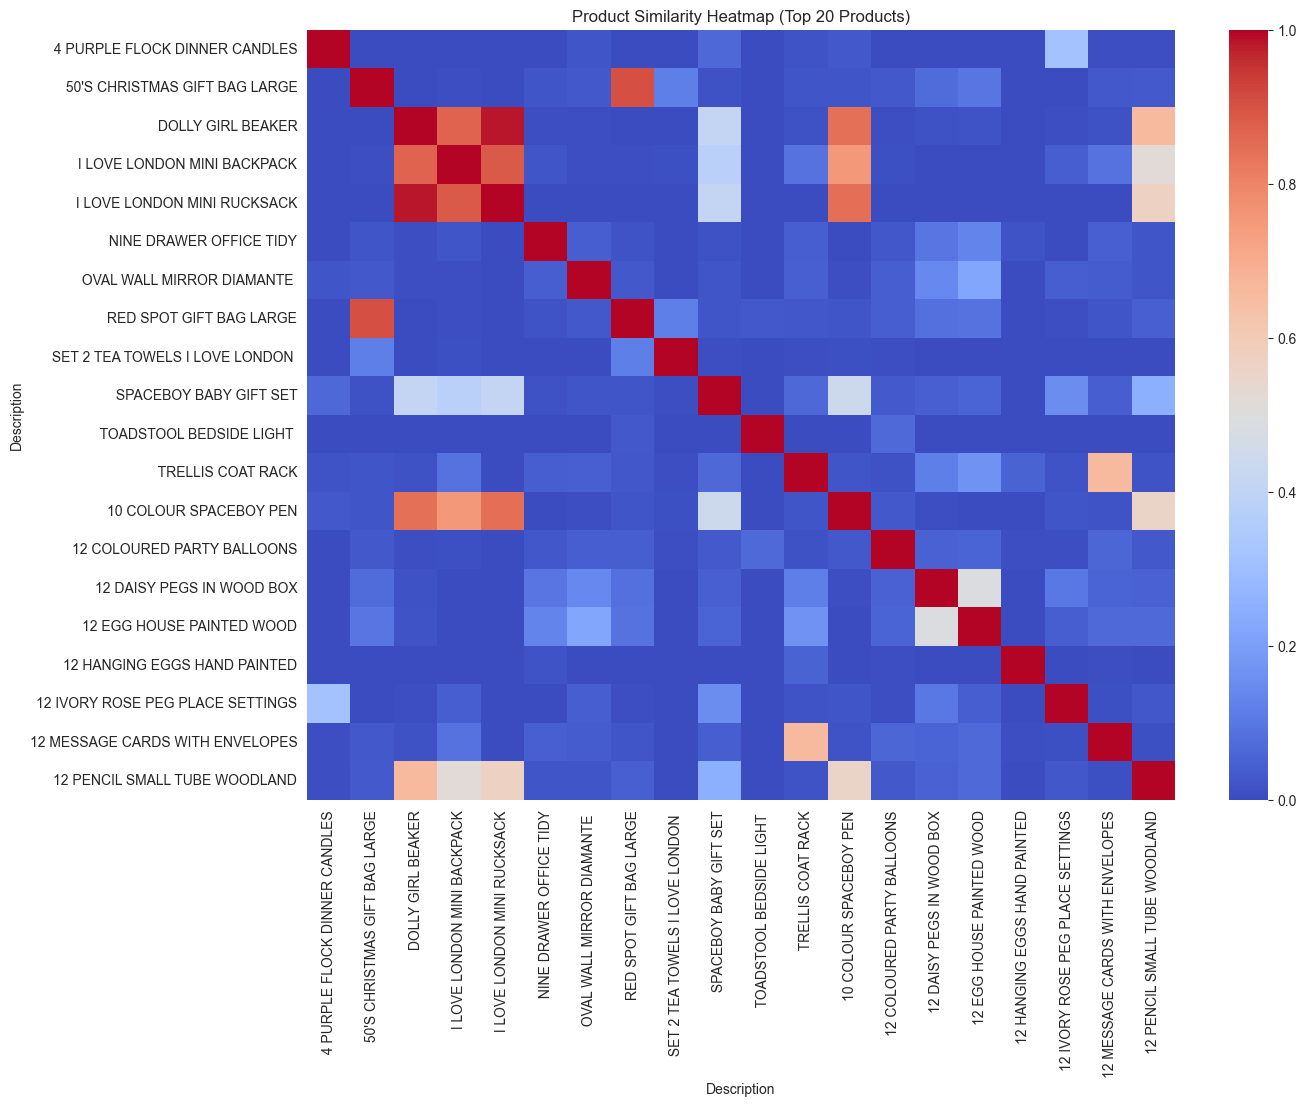

In [29]:
# Product recommendation heatmap / similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Create Customer-Product matrix
customer_product_matrix = retail_df.pivot_table(index='CustomerID',
                                         columns='Description',
                                         values='Quantity',
                                         aggfunc='sum').fillna(0)

# Transpose to get products as rows
product_matrix = customer_product_matrix.T

# Compute cosine similarity
product_similarity = cosine_similarity(product_matrix)

# Create similarity DataFrame
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=product_matrix.index,
                                     columns=product_matrix.index)

# Select top 20 products for visualization
sample_products = product_similarity_df.iloc[:20, :20]

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(sample_products, cmap='coolwarm', annot=False)
plt.title("Product Similarity Heatmap (Top 20 Products)")
plt.show()


##### 1. What did I do?

In this analysis, I visualized how similar products are to each other based on customer purchasing patterns using a heatmap.

First, I created a customer-product matrix where each row represents a customer and each column represents a product. The values in this matrix show how many times a customer has purchased each product.

I then transposed this matrix so that products became the rows, and used cosine similarity to calculate how similar each product is compared to every other product. Cosine similarity gives a value between -1 and 1, where 1 means the products are purchased together very frequently, and lower values mean less similarity.

To keep the heatmap interpretable, I selected the top 20 products and visualized their pairwise similarities using a heatmap. In this heatmap, darker colors indicate higher similarity between products, while lighter colors show less similarity.

This visualization makes it easy to identify clusters of products that customers tend to buy together. These insights are useful both for understanding product relationships and for powering item-based collaborative filtering in a recommendation system.

# **Conclusion**

In this project, we worked with online retail data to understand customer behavior and recommend products effectively.

1) Data Preparation:
We cleaned and prepared the sales data so it was accurate and ready for analysis.

2) Customer Segmentation:
Using Recency, Frequency, and Monetary value (RFM), we grouped customers into meaningful segments like High-Value or At-Risk. This helps businesses understand who their best customers are and who needs attention.

3) Clustering Approach:
By applying KMeans clustering and using the Elbow Method, we found the best number of customer groups to create.

4) Product Recommendations:
We built a recommendation system based on items customers bought together, by measuring product similarity with cosine similarity. This helps suggest products that a customer might like based on their purchase history.

5) Visualization:
Heatmaps and charts helped to visually analyze product relationships and customer profile differences.

6) Application:
We combined these insights into an interactive Streamlit web app, allowing users to get product recommendations and classify customers dynamically.

This shows how data insights and machine learning models can be turned into practical tools for targeted marketing and improving sales.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***